# Import and definitions

In [1]:
# Jupyter Notebook 
from IPython.display import clear_output

# Additional utils
import numpy as np
import pprint

# c3 Imports
from c3po.signals.envelopes import *
from c3po.signals.component import Component as Comp
from c3po.signals.signal import IQ as IQ

from c3po.optimizer.optimizer import Optimizer as Optimizer

# Specify Initial Signal/Pulse and Bounds

### Initialize and set parameters + bounds of Components of the Signal/Pulse

In [2]:
flattop_params = {
    'amp' : 15e6 * 2 * np.pi,
    'T_up' : 5e-9,
    'T_down' : 45e-9,
    'xy_angle' : 0,
    'freq_offset' : 0e6 * 2 * np.pi
}

flattop_bounds = {
    'amp': [1e3*2*np.pi, 1e9*2*np.pi],
    'T_up': [2e-9, 200e-9],
    'T_down': [2e-9, 200e-9],
    'xy_angle': [-np.pi, np.pi],
    'freq_offset': [-1e9*2*np.pi, 1e9*2*np.pi]
}

drag_params = {
    'amp' : 3e6 * 2 * np.pi,
    'T_up' : 25e-9,
    'T_down' : 30e-9,
    'xy_angle' : np.pi / 2.0,
    'freq_offset' : 0e6 * 2 * np.pi
}

drag_bounds = {
    'amp': [1e3*2*np.pi, 1e9*2*np.pi],
    'T_up': [2e-9, 200e-9],
    'T_down': [2e-9, 200e-9],
    'xy_angle': [-np.pi, np.pi],
    'freq_offset': [-1e9*2*np.pi, 1e9*2*np.pi]
}

carrier_parameters = {
    'freq' : 6e9 * 2 * np.pi
}


def my_flattop(t, params):
    t_up = params['T_up']
    t_down = params['T_down']
    return flattop(t, t_up, t_down)


# Component 1 of the signal
flat = Comp(
    desc = "pulse1",
    shape = my_flattop,
    params = flattop_params,
    bounds = flattop_bounds
)

# Each component has a Universally unique identifier (UUID) that identifies/represents the instance of the object
print("flat uuid: " + str(flat.get_uuid()))

# Component 2 of the signal
drag = Comp(
    desc = "pulse2",
    shape = my_flattop,
    params = drag_params,
    bounds = drag_bounds
)

# Each component has a Universally unique identifier (UUID) that identifies/represents the instance of the object
print("drag uuid: " + str(drag.get_uuid()))

# Component 3 of the signal; the carrier doesn't have a shape only parameters
carr = Comp(
    desc = "carrier",
    params = carrier_parameters
)

# Each component has a Universally unique identifier (UUID) that identifies/represents the instance of the object
print("carr uuid: " + str(carr.get_uuid()))

flat uuid: 382738e8-d7a0-42af-a374-803026c9223a
drag uuid: e9f0bf55-f9de-4dfb-9a9d-6e9039b5aaa4
carr uuid: ebd4dacc-f3f4-416e-adf1-c2e32cc0221d


### Build Signal with Components 

In [3]:
comps = []
comps.append(carr)
comps.append(flat)
comps.append(drag)

In [4]:
sig = IQ()
sig.t_start = 0
sig.t_end = 150e-9
sig.res = 1e9

sig.calc_slice_num()
sig.create_ts()

sig.comps = comps

sig.save_params_to_history("initial")

In [5]:
pprint.pprint(sig.get_parameters())

{'T_down': {UUID('382738e8-d7a0-42af-a374-803026c9223a'): {'bounds': [2e-09,
                                                                      2e-07],
                                                           'value': 4.5e-08},
            UUID('e9f0bf55-f9de-4dfb-9a9d-6e9039b5aaa4'): {'bounds': [2e-09,
                                                                      2e-07],
                                                           'value': 3e-08}},
 'T_up': {UUID('382738e8-d7a0-42af-a374-803026c9223a'): {'bounds': [2e-09,
                                                                    2e-07],
                                                         'value': 5e-09},
          UUID('e9f0bf55-f9de-4dfb-9a9d-6e9039b5aaa4'): {'bounds': [2e-09,
                                                                    2e-07],
                                                         'value': 2.5e-08}},
 'amp': {UUID('382738e8-d7a0-42af-a374-803026c9223a'): {'bounds': [6283.1853071795

In [6]:
#sig.plot_IQ_components()

In [7]:
#sig.plot_fft_IQ_components()

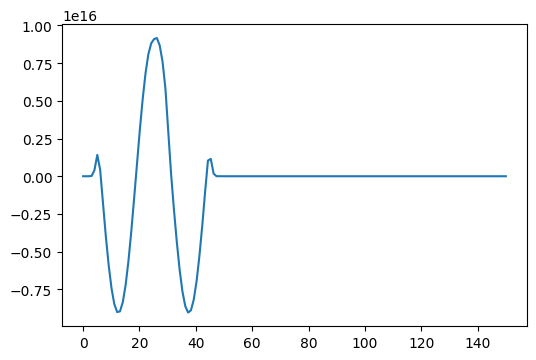

In [8]:
sig.plot_signal()

In [9]:
#sig.plot_fft_signal()

# Calibration

In [10]:
optim = Optimizer()

In [11]:
opt_map = {
    'amp' : [(sig.get_uuid(), flat.get_uuid()), (sig.get_uuid(), drag.get_uuid())],
    'T_up' : [(sig.get_uuid(), flat.get_uuid()), (sig.get_uuid(), drag.get_uuid())],
    'T_down' : [(sig.get_uuid(), flat.get_uuid()), (sig.get_uuid(), drag.get_uuid())],
    'xy_angle': [(sig.get_uuid(), flat.get_uuid()), (sig.get_uuid(), drag.get_uuid())],
    'freq_offset': [(sig.get_uuid(), flat.get_uuid())]
}

In [12]:
pprint.pprint(opt_map)

{'T_down': [(UUID('0826bf8d-9fc9-4d80-8f18-9f86a6eff633'),
             UUID('382738e8-d7a0-42af-a374-803026c9223a')),
            (UUID('0826bf8d-9fc9-4d80-8f18-9f86a6eff633'),
             UUID('e9f0bf55-f9de-4dfb-9a9d-6e9039b5aaa4'))],
 'T_up': [(UUID('0826bf8d-9fc9-4d80-8f18-9f86a6eff633'),
           UUID('382738e8-d7a0-42af-a374-803026c9223a')),
          (UUID('0826bf8d-9fc9-4d80-8f18-9f86a6eff633'),
           UUID('e9f0bf55-f9de-4dfb-9a9d-6e9039b5aaa4'))],
 'amp': [(UUID('0826bf8d-9fc9-4d80-8f18-9f86a6eff633'),
          UUID('382738e8-d7a0-42af-a374-803026c9223a')),
         (UUID('0826bf8d-9fc9-4d80-8f18-9f86a6eff633'),
          UUID('e9f0bf55-f9de-4dfb-9a9d-6e9039b5aaa4'))],
 'freq_offset': [(UUID('0826bf8d-9fc9-4d80-8f18-9f86a6eff633'),
                  UUID('382738e8-d7a0-42af-a374-803026c9223a'))],
 'xy_angle': [(UUID('0826bf8d-9fc9-4d80-8f18-9f86a6eff633'),
               UUID('382738e8-d7a0-42af-a374-803026c9223a')),
              (UUID('0826bf8d-9fc9-4d80-8f18-9f86a

In [13]:
opt_params = optim.get_corresponding_signal_parameters([sig], opt_map)

In [14]:
pprint.pprint(opt_params)

{'bounds': [[6283.185307179586, 6283185307.179586],
            [6283.185307179586, 6283185307.179586],
            [2e-09, 2e-07],
            [2e-09, 2e-07],
            [2e-09, 2e-07],
            [2e-09, 2e-07],
            [-3.141592653589793, 3.141592653589793],
            [-3.141592653589793, 3.141592653589793],
            [-6283185307.179586, 6283185307.179586]],
 'origin': [('amp',
             (UUID('0826bf8d-9fc9-4d80-8f18-9f86a6eff633'),
              UUID('382738e8-d7a0-42af-a374-803026c9223a'))),
            ('amp',
             (UUID('0826bf8d-9fc9-4d80-8f18-9f86a6eff633'),
              UUID('e9f0bf55-f9de-4dfb-9a9d-6e9039b5aaa4'))),
            ('T_up',
             (UUID('0826bf8d-9fc9-4d80-8f18-9f86a6eff633'),
              UUID('382738e8-d7a0-42af-a374-803026c9223a'))),
            ('T_up',
             (UUID('0826bf8d-9fc9-4d80-8f18-9f86a6eff633'),
              UUID('e9f0bf55-f9de-4dfb-9a9d-6e9039b5aaa4'))),
            ('T_down',
             (UUID('0826bf8d-9f

In [15]:
initial_spread = [ 5e6*2*np.pi, 5e6*2*np.pi, 5e-9, 5e-9, 5e-9, 5e-9, 0.1, 0.1, 20e6*2*np.pi]

opt_settings = {
    'CMA_stds': initial_spread,
    'ftarget' : 1e-4,
    'popsize' : 5
}

In [16]:
import random

def evaluate_signals(samples_rescaled):
#     print(samples_rescaled)
#     i = 0
#     for sample in samples_rescaled:
#         sample.plot_signal()
#         print("sample: " + str(i))
#         i += 1
    return [random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)]

In [17]:
optim = Optimizer()

In [18]:
optim.optimize_signal(
    signals = [sig],
    opt_map = opt_map,
    opt = 'cmaes',
    settings = opt_settings,
    calib_name = 'test',
    eval_func = evaluate_signals
    )

(2_w,5mirr1)-aCMA-ES (mu_w=1.6,w_1=73%) in dimension 9 (seed=417084, Thu Aug  8 17:15:05 2019)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      5 1.805537725887136e-01 1.0e+00 8.73e-01  4e-03  2e-02 0:00.0
    2     10 1.967231975711797e-01 1.1e+00 7.79e-01  4e-03  2e-02 0:00.0
    3     15 1.111152823362934e-01 1.1e+00 7.41e-01  4e-03  2e-02 0:00.0
  100    500 9.913022355379986e-02 2.9e+00 1.90e-01  1e-03  5e-03 0:00.2
  200   1000 8.677163989016679e-02 6.9e+00 2.25e+00  1e-02  8e-02 0:00.3
  300   1500 2.945180462221109e-02 1.4e+01 2.44e+01  7e-02  1e+00 0:00.5
  337   1685 6.700722874097842e-05 2.1e+01 4.38e+01  1e-01  2e+00 0:00.6


In [19]:
pprint.pprint(sig.get_history())

[('initial',
  {'T_down': {UUID('382738e8-d7a0-42af-a374-803026c9223a'): {'bounds': [2e-09,
                                                                        2e-07],
                                                             'value': 4.5e-08},
              UUID('e9f0bf55-f9de-4dfb-9a9d-6e9039b5aaa4'): {'bounds': [2e-09,
                                                                        2e-07],
                                                             'value': 3e-08}},
   'T_up': {UUID('382738e8-d7a0-42af-a374-803026c9223a'): {'bounds': [2e-09,
                                                                      2e-07],
                                                           'value': 5e-09},
            UUID('e9f0bf55-f9de-4dfb-9a9d-6e9039b5aaa4'): {'bounds': [2e-09,
                                                                      2e-07],
                                                           'value': 2.5e-08}},
   'amp': {UUID('382738e8-d7a0-42af-a374-8030